In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
from data_load import load_data
from data_visualization import visualize_volume_avg_hour
from data_processing import (transform_avg_volume_hourly,
                             transform_buy_sell_volume,
                             calculate_V,
                             calculate_bucket_number,
                             calculate_vpin,
                             )

In [3]:
# Load data
data_tick = load_data()
data_orderbook = load_data(folder= "orderbook")
data_vn30_index = load_data(folder = "")

## PHẦN 1: VOLUME THEO THỜI GIAN

In [4]:
key1 = "STB"
key2 = "SAB"
STB_avg_hourly, SAB_avg_hourly = transform_avg_volume_hourly(data_tick)
SAB_avg_hourly, STB_avg_hourly


(   Hour         KL
 0     9  58.772920
 1    10  54.110919
 2    11  42.729430
 3    13  55.199203
 4    14  54.119795,
    Hour          KL
 0     9  238.257788
 1    10  219.788697
 2    11  223.656007
 3    13  250.128809
 4    14  275.724979)

- Vì sàn chứng khoáng Việt Nam chỉ giao dịch từ:
    - 9h sáng 11h30 trưa
    - Nghỉ trưa từ 11h30 đến 13h chiều
    - Hoặt động lại từ 13h chiều đến 15h00 chiều
- Do đó dữ liệu theo giờ chỉ có ở các mốc 9, 10, 11, 13, 14 (làm tròn lùi theo giờ)

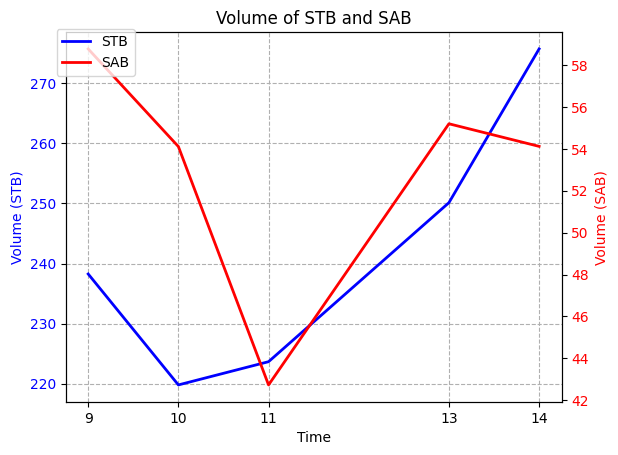

In [5]:
visualize_volume_avg_hour(STB_avg_hourly, SAB_avg_hourly)

## PHẦN 2: VPIN

In [6]:
# Chọn ra 1 loại cổ phiêú
key1 = "STB"
STB = transform_buy_sell_volume(data_orderbook, key1 = key1)
STB.head()

,Date,KL_mua,KL_ban,KL
0,2024-09-23 13:00:05,39880.0,119180.0,159060.0
1,2024-09-23 13:00:07,39740.0,0.0,39740.0
2,2024-09-23 13:00:09,0.0,60260.0,60260.0
3,2024-09-23 13:00:10,0.0,60470.0,60470.0
4,2024-09-23 13:00:13,39650.0,0.0,39650.0


In [7]:
# # Tính V
V = calculate_V(STB)
V

np.float64(10597695.6)

In [8]:
# # Chia bucket
bucket_df = calculate_bucket_number(STB, V)
bucket_df.head()

,Date,KL_mua,KL_ban,KL,bucket_number
0,2024-09-23 13:00:05,39880.0,119180.0,159060.0,1
1,2024-09-23 13:00:07,39740.0,0.0,39740.0,1
2,2024-09-23 13:00:09,0.0,60260.0,60260.0,1
3,2024-09-23 13:00:10,0.0,60470.0,60470.0,1
4,2024-09-23 13:00:13,39650.0,0.0,39650.0,1


In [10]:
# Tính vpin
vpin_df = calculate_vpin(bucket_df,
                    n = 50,
                    V = V)
vpin_df.head()

,VPIN,start_bucket,end_bucket
0,0.441512,1,50
1,0.444328,2,51
2,0.447070,3,52
3,0.456309,4,53
4,0.461417,5,54


In [11]:
vpin_df

,VPIN,start_bucket,end_bucket
0,0.441512,1,50
1,0.444328,2,51
2,0.447070,3,52
3,0.456309,4,53
4,0.461417,5,54
...,...,...,...
509,0.510211,510,559
510,0.504041,511,560
511,0.506761,512,561
512,0.495573,513,562


In [12]:
bucket_df["Date"]

0       2024-09-23 13:00:05
1       2024-09-23 13:00:07
2       2024-09-23 13:00:09
3       2024-09-23 13:00:10
4       2024-09-23 13:00:13
                ...        
85535   2024-11-15 14:29:37
85536   2024-11-15 14:29:48
85537   2024-11-15 14:29:49
85538   2024-11-15 14:29:51
85539   2024-11-15 14:29:57
Name: Date, Length: 85540, dtype: datetime64[ns]